In [1]:
#Hydrogen atom wavefunctions (two-body system)

#import modules
import numpy as np
import scipy.special as spe
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
import ipyvolume as ipv

(0.0, 70.0)

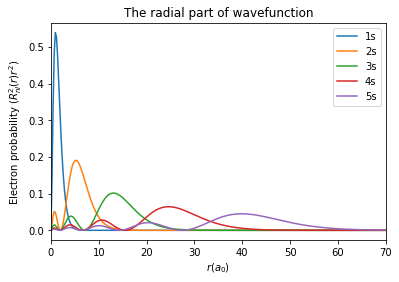

In [2]:
#The radial part of wavefunction (The Laguerre polynomials)
'''
abbreviation:
    a0: Bohr radius
    r: Radial coordinate
    n: Principle quantum number
    l: Angular momentum quantum number
formula:
    Rnl(r)=np.sqrt(((2/(na0))**3)*((n−l−1)!/(2n(n+l))!))*e**(−r/na0)*((2r/na0)**l)*L2l+1,n−l−1(2r/na0)
'''
#The radial part function
def Psi_radial(r,n=1,l=0):
    root_part = np.sqrt(np.power((2.0/n),3)*spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    return root_part*np.exp(-r/n)*np.power((2.0*r/n),l)*spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
#increase r number (3rd number in linspace) for better resolutions
r = np.linspace(0,70,300)
#plot
plt.plot(r, np.power(Psi_radial(r,n=1,l=0),2)*np.power(r,2),label='1s')
plt.plot(r, np.power(Psi_radial(r,n=2,l=0),2)*np.power(r,2),label='2s')
plt.plot(r, np.power(Psi_radial(r,n=3,l=0),2)*np.power(r,2),label='3s')
plt.plot(r, np.power(Psi_radial(r,n=4,l=0),2)*np.power(r,2),label='4s')
plt.plot(r, np.power(Psi_radial(r,n=5,l=0),2)*np.power(r,2),label='5s')

plt.xlabel('$r(a_0)$')
plt.ylabel('Electron probability ($R_{nl}^2(r)r^2$)')
plt.title('The radial part of wavefunction')
plt.legend()
plt.xlim(min(r),max(r))

In [3]:
#interactive mode of the radial part of wavefunction (The Laguerre polynomials)

max_n=10 #maximum number in interactive dropdown menu (from quantum max_l=n-1)
@widgets.interact(n = np.arange(1,max_n,1), l = np.arange(0,max_n-1,1))
#interactive function
def interactive_radial(n=1,l=0):
    r = np.linspace(0,70,1000)
    #plot
    plt.plot(r, np.power(Psi_radial(r,n,l),2)*np.power(r,2))    
    plt.xlabel('$r(a_0)$')
    plt.ylabel('Electron probability ($R_{nl}^2(r)r^2$)')
    plt.title(f'The radial part of wavefunction (interactive)\n $n,l={n,l}$')
    #plt.xlim(0, 2*n**2*(1+0.5*(1-l*(l+1)/n**2))) #limit r with max

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

(-1.0, 1.0)

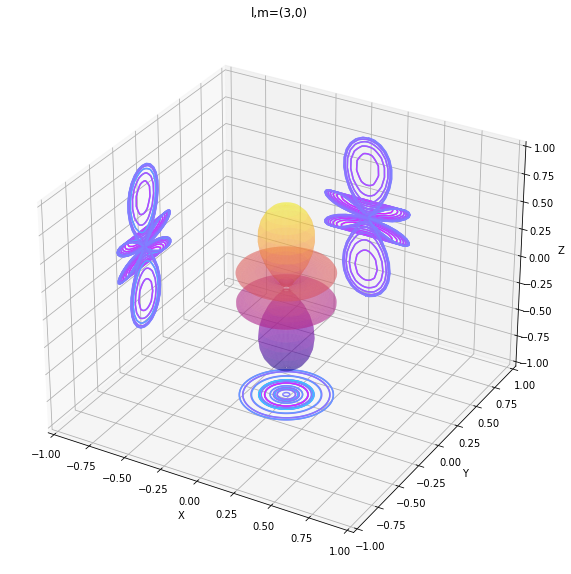

In [12]:
#Angular part of wavefunction (Spherical harmonics)
%matplotlib inline
#%matplotlib qt #use qt for 3d interactive
'''
abbreviation:
    theta: Polar coordinate
    phi: Azimuthal coordinate
    l: Angular momentum quantum number
    m: Magnetic quantum number
formula:
    Ylm(θ,ϕ)=Θlm(θ)Φm(ϕ)=np.sqrt(((2l+1)/(4π))*((l−m)!/(l+m)!))*Plm(cosθ)⋅e**(imϕ)
'''
def Psi_angular(phi,theta,l=0,m=0):
    return spe.sph_harm(m,l,phi,theta).real #a0=1 and normalized angular function
#increase phi,theta and rcount, ccount for better resolution
phi = np.linspace(0, 2*np.pi, 100) #Azimuthal (longitudinal) coordinate; must be in [0, 2*pi].
theta=np.linspace(0, np.pi, 100) #Polar (colatitudinal) coordinate; must be in [0, pi].
phi, theta = np.meshgrid(phi, theta)
Ylm = Psi_angular(theta,phi,l=3,m=0)
x = np.sin(phi)*np.cos(theta)*abs(Ylm)
y = np.sin(phi)*np.sin(theta)*abs(Ylm)
z = np.cos(phi)*abs(Ylm)
#plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rcount=100, ccount=100,cmap='plasma',lw=0,alpha=0.4)
#3D Projection
cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='cool')
cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='cool' )
cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='cool')
#ax title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('l,m=(3,0)')
#sin & cos limit
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

In [5]:
#Full atomic orbitlals
#Ψnlm(r,θ,ϕ)=Rnl(r)*Ylm(θ,ϕ)=Rnl(r)*Θlm(θ)*Φm(ϕ)
'''
abbreviation:
    r: Radial coordinate
    theta: Polar coordinate
    phi: Azimuthal coordinate
    n: Principle quantum number
    l: Angular momentum quantum number
    m: Magnetic quantum number
formula:
    Ψnlm(r,θ,ϕ)=Rnl(r)*Ylm(θ,ϕ)
'''
def Psi_Hydrogen(r,theta,phi,n,l,m):
    return Psi_radial(r,n,l) * Psi_angular(phi,theta,l,m)
max_n = 10
max_l = max_n-1
#plot zx projection (interactive)
@widgets.interact(n=np.arange(1,max_n,1), l = np.arange(0,max_n-1,1), m=np.arange(-max_l,max_l+1,1))
def Psi_zx_plot(n=1,l=0,m=0):
    plt.figure(figsize=(10,8))
    limit = 4*(n+l) 
    x_1d = np.linspace(-limit,limit,200)
    z_1d = np.linspace(-limit,limit,200)
    x,z = np.meshgrid(x_1d,z_1d)
    y   = 0
    Psi = Psi_Hydrogen(np.sqrt(x**2+y**2+z**2),np.arctan2(np.sqrt(x**2+y**2),z),np.arctan2(y, x),n,l,m)
    plt.contourf(x,z,Psi,80,cmap='jet',alpha=0.5)  # Classic orbitals
    plt.colorbar()
    plt.title(f"$n,l,m={n,l,m}$")
    plt.xlabel('X')
    plt.ylabel('Z')

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [6]:
#plot yx projection (interactive)
@widgets.interact(n=np.arange(1,max_n,1), l = np.arange(0,max_n-1,1), m=np.arange(-max_l,max_l+1,1))
def Psi_yx_plot(n=1,l=0,m=0):
    plt.figure(figsize=(10,8))
    limit = 4*(n+l) 
    x_1d = np.linspace(-limit,limit,200)
    y_1d = np.linspace(-limit,limit,200)
    x,y = np.meshgrid(x_1d,y_1d)
    z = 0
    Psi = Psi_Hydrogen(np.sqrt(x**2+y**2+z**2),np.arctan2(np.sqrt(x**2+y**2),z),np.arctan2(y,x),n,l,m)
    plt.contourf(x,y,Psi,80,cmap='jet',alpha=0.5)  # Classic orbitals
    plt.colorbar()
    plt.title(f"$n,l,m={n,l,m}$")
    plt.xlabel('X')
    plt.ylabel('Y')

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [7]:
#plot zy projection (interactive)
@widgets.interact(n=np.arange(1,max_n,1), l = np.arange(0,max_n-1,1), m=np.arange(-max_l,max_l+1,1))
def Psi_zy_plot(n=1,l=0,m=0):
    plt.figure(figsize=(10,8))
    limit = 4*(n+l) 
    y_1d = np.linspace(-limit,limit,500)
    z_1d = np.linspace(-limit,limit,500)
    y,z = np.meshgrid(y_1d,z_1d)
    x = 0
    Psi = Psi_Hydrogen(np.sqrt(x**2+y**2+z**2),np.arctan2(np.sqrt(x**2+y**2),z),np.arctan2(y, x),n,l,m)
    plt.contourf(y,z,Psi,80,cmap='jet',alpha=0.5)
    plt.colorbar()
    plt.title(f"$n,l,m={n,l,m}$")
    plt.xlabel('Y')
    plt.ylabel('Z')

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [8]:
#interactive 3d with ipv
maxi = 50
resolution = 200
base = np.linspace(-maxi, maxi, resolution)[:,np.newaxis,np.newaxis]
z2 = np.tile(base, (1,resolution,resolution))
y2 = np.swapaxes(z2,0,1)
x2 = np.swapaxes(z2,0,2)
total = np.concatenate((x2[np.newaxis,:],y2[np.newaxis,:],z2[np.newaxis,:]), axis=0)
r2 = np.linalg.norm(total, axis=0)
#r2=np.sqrt(x2**2+y2**2+z2**2)
#np.seterr(all='ignore')
theta2 = np.arctan(np.divide(total[2],np.linalg.norm(total[:2], axis=0))) + np.pi/2
phi2 = np.arctan2(total[1],total[0])
ipv.figure()
ipv.quickvolshow((r2**2)*(np.sin(theta2))*(Psi_Hydrogen(r2,theta2,phi2,4,3,0)**2))
ipv.show()

In [ ]:
from mayavi import mlab
mlab.figure()
mask = 1
def Psi_3d_plot(n=4,l=3,m=0):
    w = Psi_Hydrogen(r2,theta2,phi2,n,l,m)
    m=mlab.contour3d(w*mask,contours=8,transparent=True)
    m.actor.actor.rotate_y(90)
##plot all n=2-5
#def Psi_3d_plot():
#    for n in range(2,5):
#        for l in range(1,n):
#            for m in range(-l,l+1,1):
#                w = Psi_Hydrogen(r2,theta2,phi2,n,l,m)
#                m=mlab.contour3d(w*mask,contours=6,transparent=True)
#                m.actor.actor.rotate_y(90)
Psi_3d_plot()
mlab.colorbar()
mlab.outline()
mlab.show()